<a href="https://colab.research.google.com/github/Sylver640/ADA-Informes/blob/main/Informe_Select.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Descripción del problema (selección)
**Entrada**: Conjunto de $n$ números diferentes $A$ más un índice $i$.

**Salida**: Elemento $x\in A$, que es mayor a exactamente $i-1$ elementos de $A$, siendo el elemento $x$ el estadístico de orden $i$-ésimo para el conjunto $A$.

Saliendo del área de optimización y orden, muchos algoritmos existen también para ser utilizados en aquella ciencia que estudia la variabilidad, organización o análisis de datos, es decir, **la estadística**. Un concepto de esta disciplina es el llamado **estadístico de orden**, que corresponde al $k$-ésimo valor más pequeño de una muestra. Aunque por su característica pueda parecer como algo poco utilizado, la realidad es que estos valores son una herramienta fundamental dentro de la estadística no paramétrica o de inferencia, en donde los datos no están distribuidos bajo un criterio especificado. Así, el problema de la **selección** está muy ligado a estos estadísticos, en donde manejamos la problemática de elegir el $i$-ésimo estadístico de orden en un conjunto de $n$ elementos.

![image](https://www.salamarkesa.com/wp-content/uploads/2016/11/apuntes-estadistica.jpg)

#2. Select

##2.1 Código
A continuación, el siguiente código presenta una implementación del algoritmo.

In [62]:
import random
from termcolor import cprint

comparisons = 0

def insertion_sort (array, verbose):
  if verbose == True: 
    print("\n#######")
    print("Se ordena un arreglo!")
    print("Arreglo a ordenar: ", array)

  #Contador de comparaciones en el ciclo for
  global comparisons

  #Se recorre el arreglo
  for i in range (1, len(array)):
    if verbose == True: print("Pasada",i)
    data = array[i]
    k = i-1
    if verbose == True:
      if array[k] < data: print("Elemento no movido\n")
    while k >= 0 and array[k] >= data:
      array[k+1] = array[k]
      k = k-1
      comparisons+=1
      if verbose == True: print(array,"\n")
    array[k+1] = data
    if verbose == True: print(f"Al finalizar pasada: {array}\n")

  if verbose == True: 
    print(f"Arreglo ordenado: {array}")
    print("#######\n")

  return array #Se retorna el arreglo ordenado

#Función que encuentra la mediana de un arreglo
def encontrarMediana(A, l, n, verbose):
  aux = [] #Arreglo auxiliar que guarda los elementos del subarreglo a analizar
  for i in range(l, l + n):
    aux.append(A[i])

  aux = insertion_sort(aux, verbose) #Se ordena dicho subarreglo
  return aux[n // 2] #Como lo dice su nombre, se retorna el objeto que está justo al medio del arreglo, es decir, su mediana

#Implementación de partition que usa como pivote el último elemento
def partition(A, p, r, x, verbose):
  if verbose == True:
    print("\n#######")
    print("Se entra a función partition!")
  global comparisons
  
  #Se intercambia el valor x por el valor final, con tal de trabajar con este como pivote
  for i in range(p, r):
    if (A[i] == x):
      A[r], A[i] = A[i], A[r]
      comparisons+=1
      break

  if verbose == True:
    print(f"Arreglo a dividir: {A[p:r+1]}")
  pivot = A[r] #Pivote es el último elemento
  if verbose == True:
    print(f"Pivote: [{A[r]}]")
  i = p #El puntero de intercambio comenzará desde el inicio del arreglo
  for j in range(p,r): #Mientras que el puntero j recorrerá todo el intervalo
    if A[j] <= pivot: #Si A[j] es menor o igual al pivote se entra a esta condicional if que realiza el intercambio
      if verbose == True:
        print(f"{A[j]} es menor a {pivot}! Swap!")
      A[j], A[i] = A[i], A[j] #Se intercambian las posiciones de A[j] y A[i] 
      i+=1 #Nuestro índice izquierdo aumenta una unidad, cerrando más el intervalo
      if verbose == True:
        print(f"Arreglo luego del intercambio: {A[p:r+1]}")
      comparisons+=1

  A[i], A[r] = A[r], A[i] #Finalmente, intercambiamos nuestro pivote con la posición A[i], dejándonos así un arreglo donde la mitad izquierda es menor
                          #y la mitad derecha es mayor al pivote
  comparisons+=1
  if verbose == True:
    print(f"Arreglo tras partition: {A[p:r+1]}")
    print("#######\n")
  return i #Retornamos como pivote la posición i de nuestro arreglo

def pivotSelection(A, l, r, verbose):
  n = r - l + 1 #Número de elementos
  medianas = [] #Lista que contiene las medianas de cada subarreglo

  i = 0
  while (i < n // 5): #Proceso de división del arreglo en subarreglos de cinco elementos
    if verbose == True:
      print(f"Subarreglo de 5 elementos: {A[(l+i*5):5]}")
    medianas.append(encontrarMediana(A, l + i*5, 5, verbose)) #Se busca la mediana de este
    if verbose == True: print(f"Mediana del subarreglo: {medianas[i]}")
    i+=1
  
  #Se busca la mediana de aquel último arreglo que tiene menos de cinco elementos
  if (i * 5 < n):
    if verbose == True:
      print(f"Subarreglo de {n%5} elementos: {A[(l+i*5):(n%5)+1]}")
    medianas.append(encontrarMediana(A, l + i*5, n%5, verbose))
    if verbose == True: print(f"Mediana del subarreglo: {medianas[i]}")
    i+=1
  
  if verbose == True: print("\nBuscamos la mediana de medianas...")
  if i == 1:
    if verbose == True: print(f"Mediana de medianas: {medianas[i-1]}")
    medianaDeMedianas = medianas[i-1] #Si la lista solo contiene una mediana, será ésta la mediana de medianas
  else:
    medianaDeMedianas = pivotSelection(medianas, 0, i-1, verbose) #Llamada recursiva a pivotSelection con tal de encontrar la mediana de medianas
    if verbose == True: print(f"Mediana de medianas: {medianaDeMedianas}")
  
  if verbose == True: print(f"Ahora particionamos el arreglo {A[l:r+1]}!")
  return partition(A, l, r, medianaDeMedianas, verbose) #Finalmente, retorna el arreglo particionado con el pivote seleccionado

def select(A, l, r, k, verbose):
  #Tan solo se ingresará si k es menor o igual al número de elementos en el arreglo
  if (k > 0 and k <= r - l + 1):
    if verbose == True:
      print(f"Se busca pivote para el arreglo: {A[l:r+1]}")
    q = pivotSelection(A, l, r, verbose) #Se busca un pivote para particionar el arreglo

    #Si el pivote es igual a k, simplemente lo retornamos
    if (q - l ==  k - 1):
      if verbose == True: print(f"Encontramos el k-ésimo menor elemento! = {A[q]}")
      return A[q]
    
    #Si la posición es mayor, recorremos recursivamente el subarreglo izquierdo
    if (q - l > k - 1):
      return select(A, l, q - 1, k, verbose)
    #Si no, lo hacemos por el subarreglo derecho
    return select (A, q+1, r, k - q + l - 1, verbose)

#Ejemplo
n = random.randint(1,6)
array = random.sample(range(1,100),n)
k = random.randint(1,n)

cprint(f"Arreglo de entrada: {array}", 'yellow', attrs=["bold"])
cprint(f"k = {k}", 'yellow')
element = select(array, 0, len(array)-1, k, verbose = False)
cprint(f"k-ésimo menor elemento del arreglo: {element}", "green", attrs=["bold"])
print(f"Número de comparaciones: {comparisons}")

Arreglo de entrada: [17, 73, 12, 29, 86]
k = 5
k-ésimo menor elemento del arreglo: 86
Número de comparaciones: 11


##2.2 Descripción del algoritmo
El algoritmo **Select** es recursivo, llamándose a sí misma un total de dos veces. Éste recibe un arreglo o lista de $n$ elementos, su posición inicial, su posición final y un valor $k$, con el cual buscaremos el $k$-ésimo menor elemento dentro de la lista. A diferencia de **R-Select**, **Select** elige su pivote con ayuda de la función **pivotSelection**. En términos generales, la implementación de este algoritmo aplica la siguiente rutina gracias al algoritmo recién mencionado:
1. Al entrar a **pivotSelection**, el arreglo original de $n$ elementos se divide en $n/5$ grupos de 5 elementos cada uno, quedando el último grupo con menos elementos.
2. Luego, se encuentra la mediana de cada subarreglo, ordenándose con **Insertion Sort**.
3. Se aplica de forma recursiva **pivotSelection** con tal de encontrar la mediana de medianas ($m$) de las $n/5$ medianas identificadas anteriormente.
4. Así definimos a $m$ como el pivote para ser utilizado en la función **Partition**.
5. Finalmente, se aplicará recursivamente **Select** con el subarreglo izquierdo o derecho, sea cual sea el correspondiente para buscar el $k$-ésimo menor elemento.

Para ver paso a paso lo que sucede en el algoritmo, `verbose` debe ser igual a `True`.

##2.3 Ejemplo
Para mostrar cómo funciona el algoritmo, trabajaremos con el siguiente arreglo. Estaremos buscando el menor elemento, es decir, $k = 1$.

$A = [12, 3, 2, 9, 17, 0, 21, 7, 5, 4, 8, 11, 6, 15, 1]$

Comenzaremos buscando la mejor partición con la cual trabajar, por lo que primero dividimos el arreglo en $n/5$ subarreglos de cinco elementos cada uno. Notemos que este caso en específico considera 15 elementos, por lo que no habría ningún subarreglo menor a 5.

$[12, 3, 2, 9, 17]$ - $[0, 21, 7, 5, 4]$ - $[8, 11, 6, 15, 1]$

A continuación, ordenamos cada uno utilizando Insertion Sort, lo cual nos dejaría con los subarreglos de la siguiente forma.

$[2, 3, 9, 12, 17]$ - $[0, 4, 5, 7, 21]$ - $[1, 6, 8, 11, 15]$

Al tener estos, ahora obtenemos la mediana de cada uno, y las guardamos en el siguiente arreglo.

$M = [9, 5, 8]$

A continuación, aplicamos recursivamente **pivotSelection** con tal de encontrar la mediana de las medianas, contenida en el arreglo $M$. Por lo tanto, se ordena éste y buscamos su mediana.

$M = [5, 8, 9]$

Así, obtenemos a $8$ como nuestro pivote para particionar el arreglo $A$, que luego de haberse aplicado la función **Partition** se vería de la siguiente forma:

$A = [3, 2, 0, 7, 5, 4, 6, 1, 8, 12, 9, 17, 21, 8, 11, 15]$

Ahora bien, como estamos buscando el menor elemento trabajaremos con el subarreglo de la izquierda, es decir:

$L = [3, 2, 0, 7, 5, 4, 6, 1]$

Y puesto que este es un algoritmo recursivo, ahora aplicaremos nuevamente el procedimiento, pero ahora sobre el arreglo $L$. Así que, lo dividimos en subarreglos de $5$ elementos cada uno, pero como ahora la cantidad de elementos no es múltiplo de este número, tendremos un subarreglo con tan solo tres elementos.

$[3, 2, 0, 7, 5]$ - $[4, 6, 1]$

Ordenamos estos subarreglos, y buscamos sus medianas.

$[0, 2, 3, 5, 7]$ - $[1, 4, 6]$

$M = [3, 4]$

Aplicamos **pivotSelection** en $M$, y encontramos que nuestra mediana de medianas es $3$, por lo que este será nuestro pivote para particionar el arreglo $L$.

$L = [2, 0, 1, 3, 5, 4, 7, 6]$

Nuevamente avanzamos solo con el subarreglo izquierdo, que contiene los valores menores a $3$.

$L = [2, 0, 1]$

Debido a que es un arreglo menor a $5$, tan solo debemos ordenarlo y obtener su mediana, quedando en lo siguiente.

$L = [0, 1, 2]$

La mediana es $1$, por lo que dividimos el arreglo nuevamente en otros dos subarreglos.

$[0]$ - $[1, 2]$

Finalmente, como estábamos buscando el menor elemento de todo el arreglo, concluimos en que éste es $0$.

##2.4 Ejecución del algoritmo paso a paso (`verbose = True`)
Al determinar que `verbose` sea igual a `True` en todas las funciones, al ejecutar el programa mostrarán cómo se realiza todo paso a paso, tal como se ve a continuación:

In [63]:
n = random.randint(6,10)
array = random.sample(range(1,100),n)
k = random.randint(1,n)
cprint(f"Arreglo de entrada: {array}; k = {k}\n", 'yellow', attrs=['bold'])
element = select(array, 0, len(array)-1, k, verbose = True)
cprint(f"k-ésimo menor elemento del arreglo: {element}", 'yellow', attrs=['bold'])

Arreglo de entrada: [39, 11, 50, 26, 19, 88, 10, 1]; k = 7

Se busca pivote para el arreglo: [39, 11, 50, 26, 19, 88, 10, 1]
Subarreglo de 5 elementos: [39, 11, 50, 26, 19]

#######
Se ordena un arreglo!
Arreglo a ordenar:  [39, 11, 50, 26, 19]
Pasada 1
[39, 39, 50, 26, 19] 

Al finalizar pasada: [11, 39, 50, 26, 19]

Pasada 2
Elemento no movido

Al finalizar pasada: [11, 39, 50, 26, 19]

Pasada 3
[11, 39, 50, 50, 19] 

[11, 39, 39, 50, 19] 

Al finalizar pasada: [11, 26, 39, 50, 19]

Pasada 4
[11, 26, 39, 50, 50] 

[11, 26, 39, 39, 50] 

[11, 26, 26, 39, 50] 

Al finalizar pasada: [11, 19, 26, 39, 50]

Arreglo ordenado: [11, 19, 26, 39, 50]
#######

Mediana del subarreglo: 26
Subarreglo de 3 elementos: []

#######
Se ordena un arreglo!
Arreglo a ordenar:  [88, 10, 1]
Pasada 1
[88, 88, 1] 

Al finalizar pasada: [10, 88, 1]

Pasada 2
[10, 88, 88] 

[10, 10, 88] 

Al finalizar pasada: [1, 10, 88]

Arreglo ordenado: [1, 10, 88]
#######

Mediana del subarreglo: 10

Buscamos la mediana de m

#3. Correctitud

#4. Tiempo de ejecución

#5. Experimentos

##5.1 Número de comparaciones
A continuación, ahora considerando el algoritmo **Select**, compararemos gráficamente entre:

*   cantidad de comparaciones del peor caso calculadas matemáticamente ($O(n)$),
*   cantidad de comparaciones en el mejor caso ($\theta(n)$)
*   y la cantidad de comparaciones entre entradas ordenadas aleatoriamente.

Esto para arreglos de tamaño $n$ entre 5 y 29. Los arreglos aleatorios serán llenados con números entre 1 y 100. 

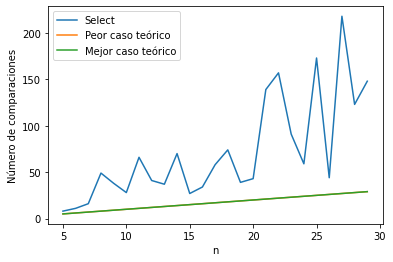

In [66]:
import matplotlib.pyplot as plt
import math
import random

x = [n for n in range(5,30)]
y1 = [n for n in range(5,30)] #Peor caso
y2 = [n for n in range(5,30)] #Mejor caso
y = []

for n in range(5, 30):
  comparisons = 0
  array = random.sample(range(1,100), n)
  k = random.randint(1,n)
  elemento = select(array, 0, len(array)-1, k, verbose = False)
  y.append(comparisons)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Select","Peor caso teórico","Mejor caso teórico"])

plt.xlabel("n")
plt.ylabel("Número de comparaciones")
plt.show()

###Análisis de resultados

##5.2 Comparación del tiempo de ejecución entre Select y R-Select

###Análisis de resultados